In [14]:
import matplotlib.pyplot as plt
import numpy as np
import uncertainties as unp
from scipy.optimize import curve_fit

In [22]:
def f1(x, a):
    return a*x

def f2(x, a, b):
    return a*x + b

In [15]:
x2 = unp.ufloat(286.6, 0.5)
x1 = unp.ufloat(212, 0.5)

s = unp.ufloat(274-225.2, 0.5)
L = x2 - x1
f = (L + s) * (L - s) / (4 * L)
print(f)

10.67+/-0.30


In [21]:
b= unp.ufloat(284.7 - 225.3, 0.1)
a = unp.ufloat(225.3 - 212, 0.3)

print(8.5 * a / b)

1.90+/-0.04


[4.02913932] [0.02547754]


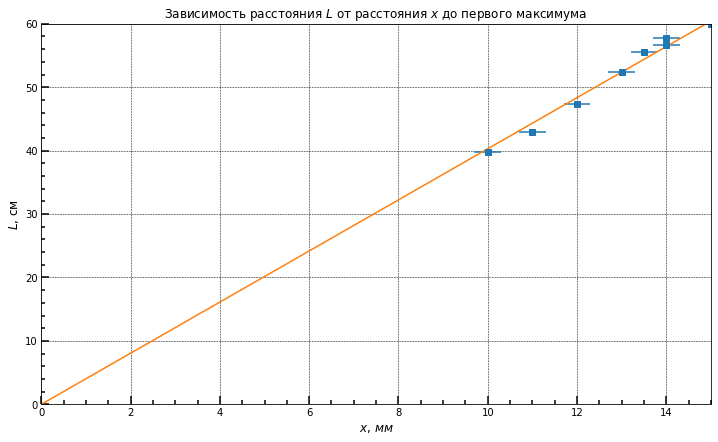

In [35]:
l_arr = [235.7, 238, 239, 240.2, 243.3, 248.3, 252.7, 255.9]
l_arr = 295.7 - np.array(l_arr)

l_err = [0.3] * len(l_arr)

x_arr = np.array([15, 14, 14, 13.5, 13, 12, 11, 10])
x_err = [0.3] * len(x_arr)


popt, perr = curve_fit(f1, x_arr, l_arr)
print(popt, np.sqrt(np.diag(perr)))

plt.rcParams["figure.figsize"] = (12,7)
plt.tick_params(which='major', direction='in', width=1.5, length=8)
plt.tick_params(which='minor', direction='in', width=1.5, length=4)
plt.minorticks_on()
plt.grid(which='major', linewidth=0.5, linestyle='dashed', color='black')

plt.errorbar(x_arr, l_arr, xerr=x_err, yerr=l_err, fmt='s')
plt.plot(np.append(x_arr, 0), f1(np.append(x_arr, 0), *popt))
plt.xlabel(r'$x$, $мм$', fontsize="large")
plt.ylabel(r'$L$, см', fontsize="large")
plt.xlim(0, 15)
plt.ylim(0, 60)
plt.title(r'Зависимость расстояния $L$ от расстояния $x$ до первого максимума')
plt.savefig("upr3_l(x).png")
plt.show()

[0.00340832 0.0045208  0.00502008] [0.02624672 0.0295858  0.02994012]
[6.52357941] [0.45777422]


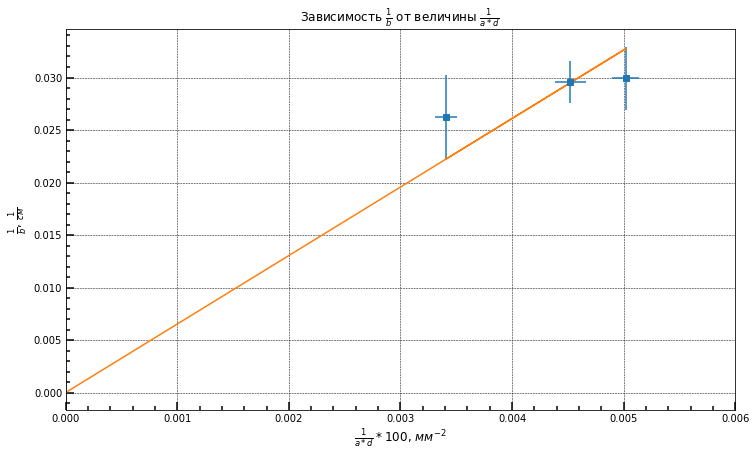

In [46]:
ekr = np.array([295.7, 290.4, 283.6])
linz = np.array([225.0, 225, 225.3])
resh = np.array([257.6, 256.6, 250.2])
rzm = np.array([9, 7, 8])
y = 1/ (ekr - resh)
x = 1 / ((resh - linz) * rzm)
print(x, y)

popt, perr = curve_fit(f1, x, y)
print(popt, np.sqrt(np.diag(perr)))

plt.rcParams["figure.figsize"] = (12,7)
plt.tick_params(which='major', direction='in', width=1.5, length=8)
plt.tick_params(which='minor', direction='in', width=1.5, length=4)
plt.minorticks_on()
plt.grid(which='major', linewidth=0.5, linestyle='dashed', color='black')

plt.errorbar(x, y, xerr=[0.0001, 0.00014, 0.00012], yerr=[0.004, 0.002, 0.003], fmt='s')
plt.plot(np.append(x, 0), f1(np.append(x, 0), *popt))
plt.xlim(0, 0.006)
plt.xlabel(r'$\frac{1}{a*d} * 100$, $мм^{-2}$', fontsize="large")
plt.ylabel(r'$\frac{1}{b}$, ${\frac{1}{см}}$', fontsize="large")
plt.title(r'Зависимость $\frac{1}{b}$ от величины $\frac{1}{a*d}$')
plt.savefig("b_1(1_a).png")
plt.show()

[13.86033447] [0.91700735]


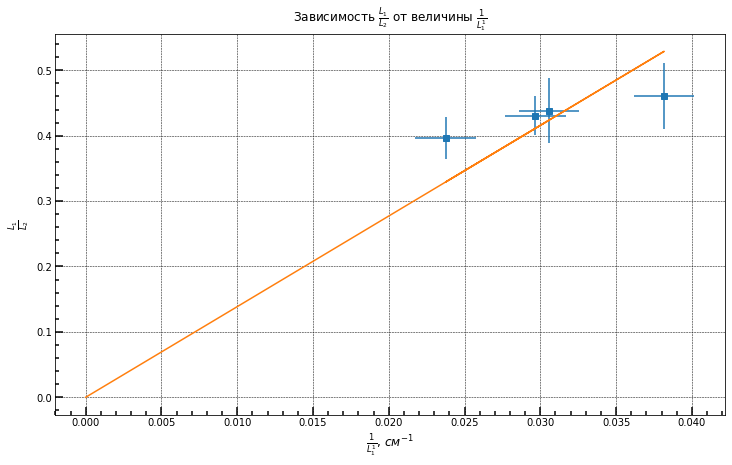

In [49]:
ekr = np.array([283.7, 284.4, 294.7, 274.6])
resh = np.array([251, 250.7, 252.6, 248.4])
linz = np.array([225.5, 225.2, 225.0, 226.0])
rzm = np.array([7, 8.5, 9, 6])

l1 = resh - linz
l2 = ekr - linz
l2_1 = ekr - resh

x = 1 / l2_1
y = l1 / l2

popt, perr = curve_fit(f1, x, y)
print(popt, np.sqrt(np.diag(perr)))

plt.rcParams["figure.figsize"] = (12,7)
plt.tick_params(which='major', direction='in', width=1.5, length=8)
plt.tick_params(which='minor', direction='in', width=1.5, length=4)
plt.minorticks_on()
plt.grid(which='major', linewidth=0.5, linestyle='dashed', color='black')

plt.errorbar(x, y, yerr=[0.05, 0.03, 0.032, 0.05], xerr=[0.002, 0.002, 0.002, 0.002], fmt='s')
plt.plot(np.append(x, 0), f1(np.append(x, 0), *popt))
plt.xlabel(r'$\frac{1}{L^1_1}$, $см^{-1}$', fontsize="large")
plt.ylabel(r'$\frac{L_1}{L_2}$', fontsize="large")
plt.title(r'Зависимость $\frac{L_1}{L_2}$ от величины $\frac{1}{L^1_1}$')
plt.savefig("upr6.png")
plt.show()